IMPORTING DATA

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
# load data in a variable name it 'playstore'
playstore = pd.read_csv('googleplaystore.csv', encoding='latin1', low_memory=False)

In [145]:
# a review to the first 3 rows of the dataframe
playstore.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [146]:
# dataframe dimensions
playstore.shape

(10841, 13)

DATAFRAME HAS 10841 ROWS AND 13 COLUMNS

In [147]:
# cheking datatypes of each column
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


I NEED TO CHANGE SOME DATATYPES COLUMNS; REVIEWS, SIZE, INSTALLS, PRICE

In [148]:
# replace special characters in installs column, convert it in integer and handle non numeric
playstore['Installs'] = pd.to_numeric(playstore['Installs'].str.replace('+', '').str.replace(',', ''), errors='coerce')

# replace special characters in price column, convert it in float and handle non numeric
playstore['Price'] = pd.to_numeric(playstore['Price'].str.replace('$', ''), errors='coerce')

# convert reviews column in integer and handle no numeric
playstore['Reviews'] = pd.to_numeric(playstore['Reviews'], errors='coerce')

C:\Users\Alejandro Verdugo\AppData\Local\Temp\ipykernel_4944\2086972117.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  playstore['Installs'] = pd.to_numeric(playstore['Installs'].str.replace('+', '').str.replace(',', ''), errors='coerce')
C:\Users\Alejandro Verdugo\AppData\Local\Temp\ipykernel_4944\2086972117.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  playstore['Price'] = pd.to_numeric(playstore['Price'].str.replace('$', ''), errors='coerce')


CHANGE DATATYPES, ELIMINATE SPECIAL CHARACTERS AND REPLACE NON NUMERIC VALUES WITH NAN

In [149]:
def convert_size(string):
    if 'M' in string or 'm' in string:
        return float(string.replace('M', '').replace('m', ''))
    elif 'K' in string or 'k' in string:
        return float(string.replace('K', '').replace('k', '')) / 1024
    else:
        return None

# apply the conversion function for the size column
playstore['Size'] = playstore['Size'].map(convert_size)

I CREATED A FUNCTION FOR COLUMN SIZE THAT REPLACE "M" or "m" FOR "WHITE SPACE". THIS SAME FUNCTION REPLACE "K" or "k" FOR "WHITE SPACE" AND DIVIDE BY 1024 TO CONVERT ALL DATA IN MEGABYTES.

In [150]:
# count and sum null values in every column in the dataframe
null_counts = playstore.isnull().sum()
null_counts

App                  0
Category             0
Rating            1474
Reviews              1
Size              1696
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

WE CAN SEE THAT DATAFRAME HAS 1474 NULL VALUES OR APPS WITHOUT A RATING AND 1696 NULL VALUES IN SIZE

In [151]:
# eliminate the rows with null values in the column rating
playstore.dropna(subset=['Rating'], inplace=True)

I DECIDED TO ELIMINATE THE ROWS WITHOUT RATING BECAUSE THIS DATA IS NOT NECESSARY FOR THE ANALYSIS.

In [152]:
# calculate the mean of column size without null values
size_mean = playstore['Size'].mean()

# replace the null values with the mean of column size
playstore['Size'].fillna(size_mean, inplace=True)

I DECIDED TO PUT THE MEAN IN NULL VALUES IN COLUMN SIZE BECAUSE THIS APPS HAS A RATING.

In [153]:
# delete all rows that contain null values ​​in any column
playstore.dropna(inplace=True)

# check null values after the cleaning
playstore.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [154]:
# check if the dataframe contains duplicate apps
duplicated_apps = playstore['App'].duplicated().sum()
duplicated_apps

1170

THIS DATAFRAME HAS 1170 DUPLICATED APPS

In [155]:
# order dataframe by reviews column in descendent order
playstore = playstore.sort_values(by='Reviews', ascending=False)

# keep only the first entry of each app (the one with the most reviews)
playstore = playstore.drop_duplicates(subset='App', keep='first')

# reset dataframe index after removing duplicates
playstore.reset_index(drop=True, inplace=True)


I DECIDED TO DELETE DUPLICATE APPS AND LEAVE ONLY THE DUPLICATE WITH MORE REVIEWS

In [156]:
# checking columns names
playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [157]:
# checking how many apps in dataframe
playstore['App'].nunique()

8190

THIS DATAFRAME HAS 8190 DIFFERENT APPS!

In [158]:
# checking how many categories in dataframe
playstore['Category'].nunique()

33

THE APPS ARE DISTRIBUITED IN 33 DIFFERENT CATEGORIES

EXPLORATORY DATA ANALYSIS

In [159]:
# take a look to the descriptive stats of rating
rating_descriptive_stats = playstore['Rating'].describe()
rating_descriptive_stats

count    8190.000000
mean        4.173346
std         0.536319
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

THE MEAN OF RATING IS VERY HIGH 4.17,
THE LOWEST APP RATING IS 1.0,
THE HIGHEST APP RATING IS 5.0

In [160]:
# calculate the most frequent rating
rating_mode = playstore['Rating'].mode()[0]
rating_mode

4.3

THE MOST FREQUENT RATING AMONG APPS IS 4.3

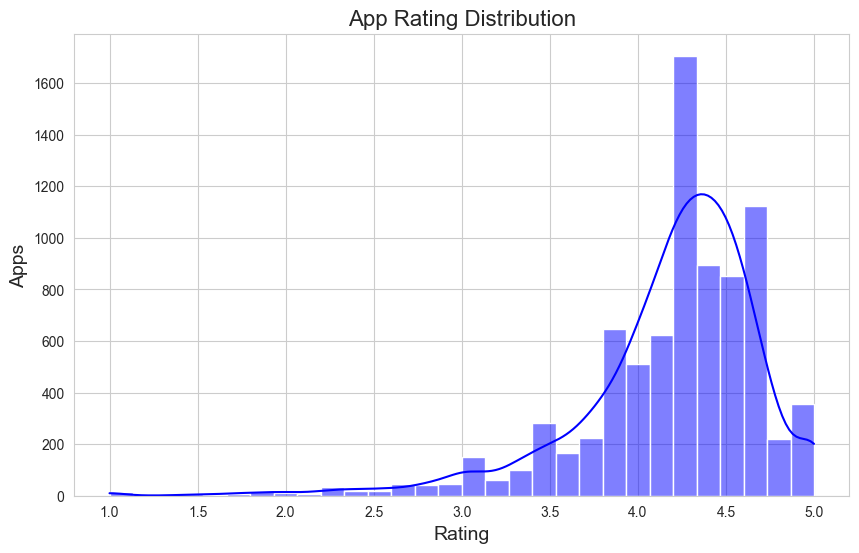

In [161]:
# Create a graph to visualize rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(playstore['Rating'], bins=30, kde=True, color='blue')
plt.title('App Rating Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Apps', fontsize=14)
plt.show()

THE RATINGS ARE CONCENTRATED BETWEEN 4.0 AND 4.7

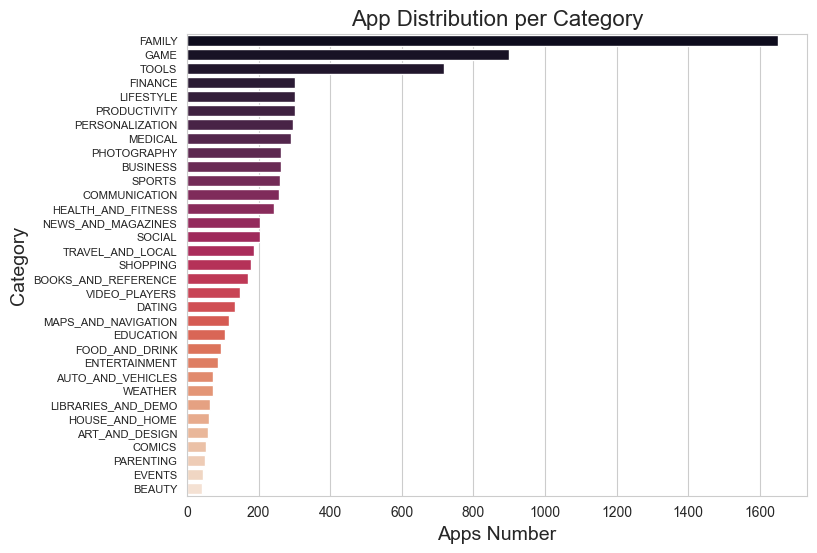

In [162]:
# visual style of the graphic
sns.set_style("whitegrid")

# calculate the number of applications per category
category_counts = playstore['Category'].value_counts()

# create graph
plt.figure(figsize=(8, 6))
sns.barplot(y=category_counts.index, x=category_counts.values, palette="rocket")
plt.title('App Distribution per Category', fontsize=16)
plt.xlabel('Apps Number', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.yticks(fontsize=8)
plt.show()


WE CAN SEE THAT THERE ARE 3 CATEGORIES WHERE THE MAJORITY OF THE APPLICATIONS ARE DISTRIBUTED: FAMILY, GAME AND TOOLS.

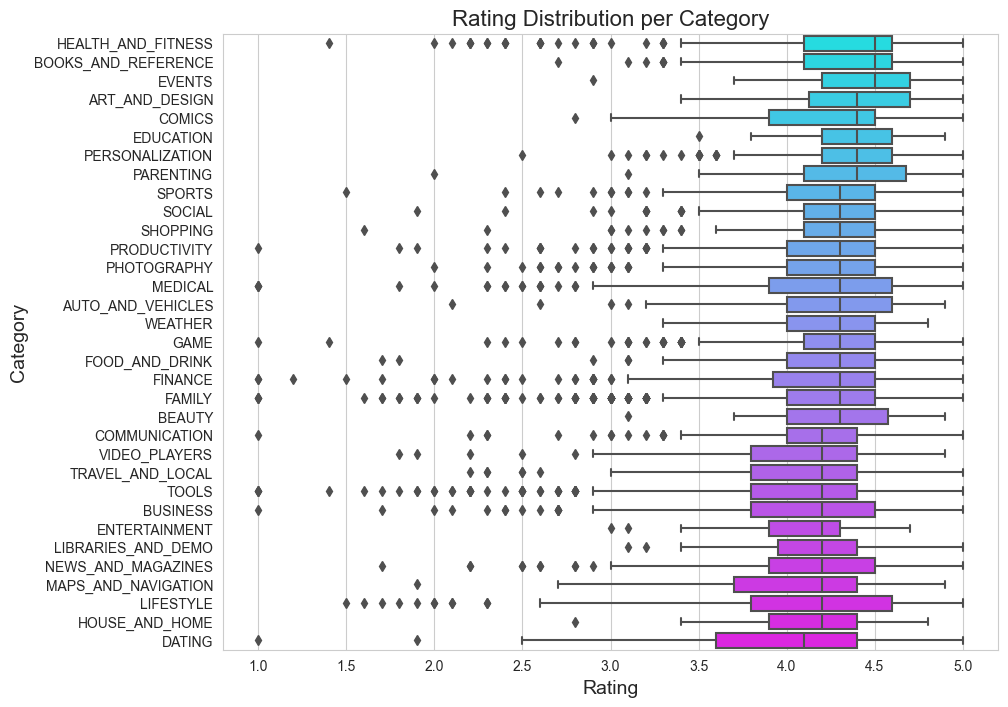

In [189]:
# set the style of the graphic
sns.set_style("whitegrid")

# calculate the median 'Rating' for each 'Category'
median_ratings = playstore.groupby('Category')['Rating'].median().sort_values(ascending=False)

# create the boxplot for the 'Rating' by 'Category', ordered by the median of 'Rating'
plt.figure(figsize=(10, 8))
sns.boxplot(data=playstore, y='Category', x='Rating', palette="cool", order=median_ratings.index)
plt.title('Rating Distribution per Category', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

AS WE SAID BEFORE, THE RATINGS BY CATEGORY ARE NOT VERY DIFFERENT AND ARE HIGH

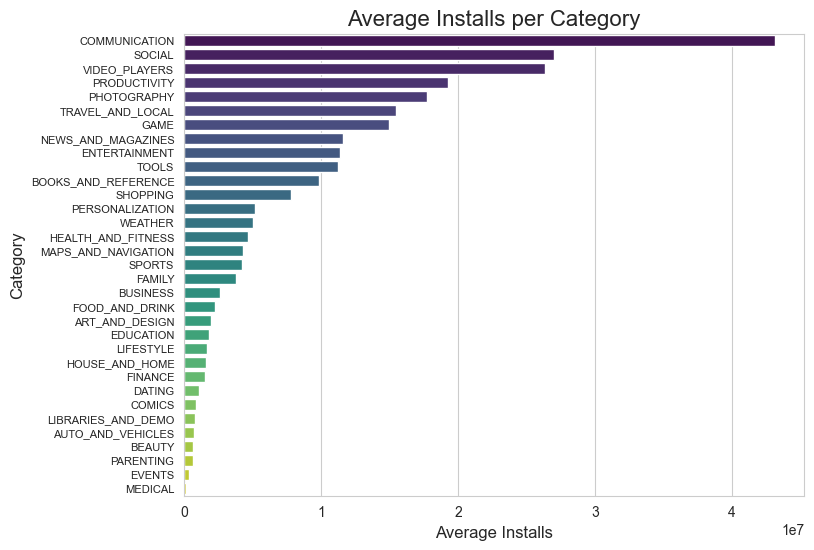

In [163]:
# average installs per category
category_installs_mean = playstore.groupby('Category')['Installs'].mean().sort_values(ascending=False)

# create a bar chart to visualize the average installs per category
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=category_installs_mean.values, y=category_installs_mean.index, palette="viridis")
plt.title('Average Installs per Category', fontsize=16)
plt.xlabel('Average Installs', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()


CATEGORIES OF COMMUNICATION, SOCIAL AND VIDEO PLAYERS ARE THE TOP 3 APPS WITH MORE AVERAGE INSTALLS

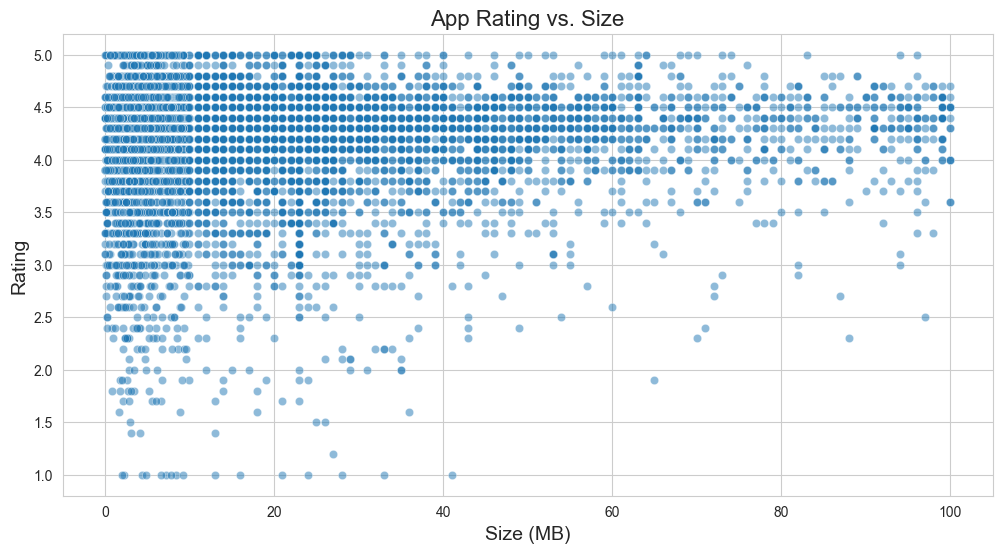

In [164]:
# create a scatter plot to visualize the relation between 'rating' and 'size'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=playstore, x='Size', y='Rating', alpha=0.5)
plt.title('App Rating vs. Size', fontsize=16)
plt.xlabel('Size (MB)', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.show()

I CAN NOTE THAT THE APPLICATIONS WITH THE BEST RATING ARE CONCENTRATED IN APPLICATIONS WITH A SIZE BETWEEN 0 AND 10 MB

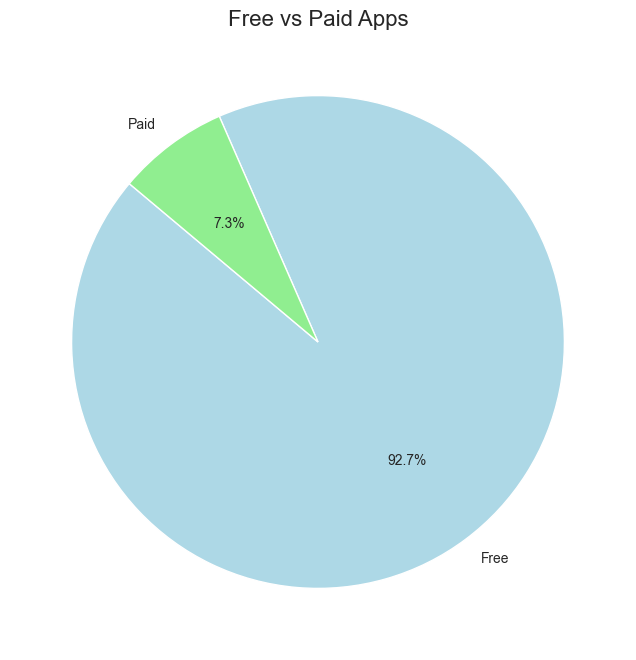

In [165]:
# count the paid and free apps
type_counts = playstore['Type'].value_counts()

# create a pie chart to visualize the ratio of free and paid apps
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])

plt.title('Free vs Paid Apps', fontsize=16)
plt.show()

THE 92% OFF APPS IN DATAFRAME ARE FOR FREE, THE REST ARE PAID APPS

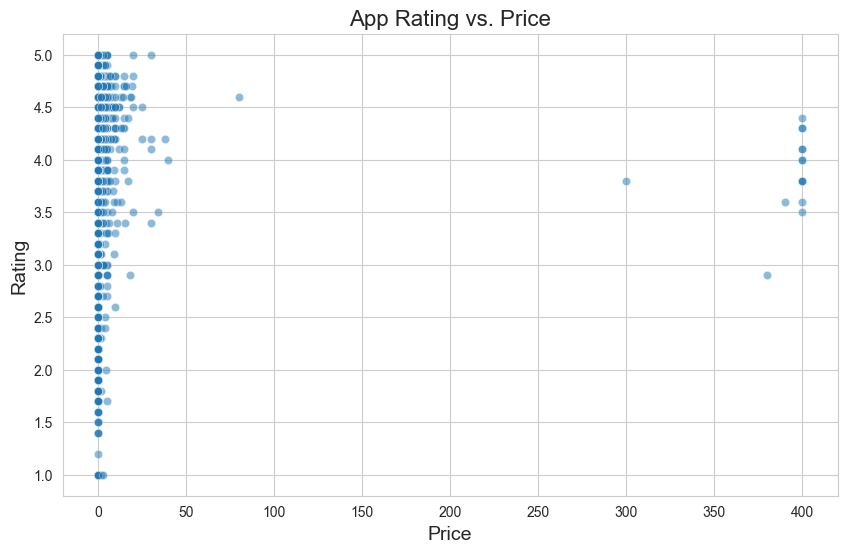

In [166]:
# create a scatter plot to visualize the relation between 'rating' and 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=playstore, x='Price', y='Rating', alpha=0.5)
plt.title('App Rating vs. Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.show()

MOST OF THE TOP RATED APPS ARE PRICED NO MORE THAN $20

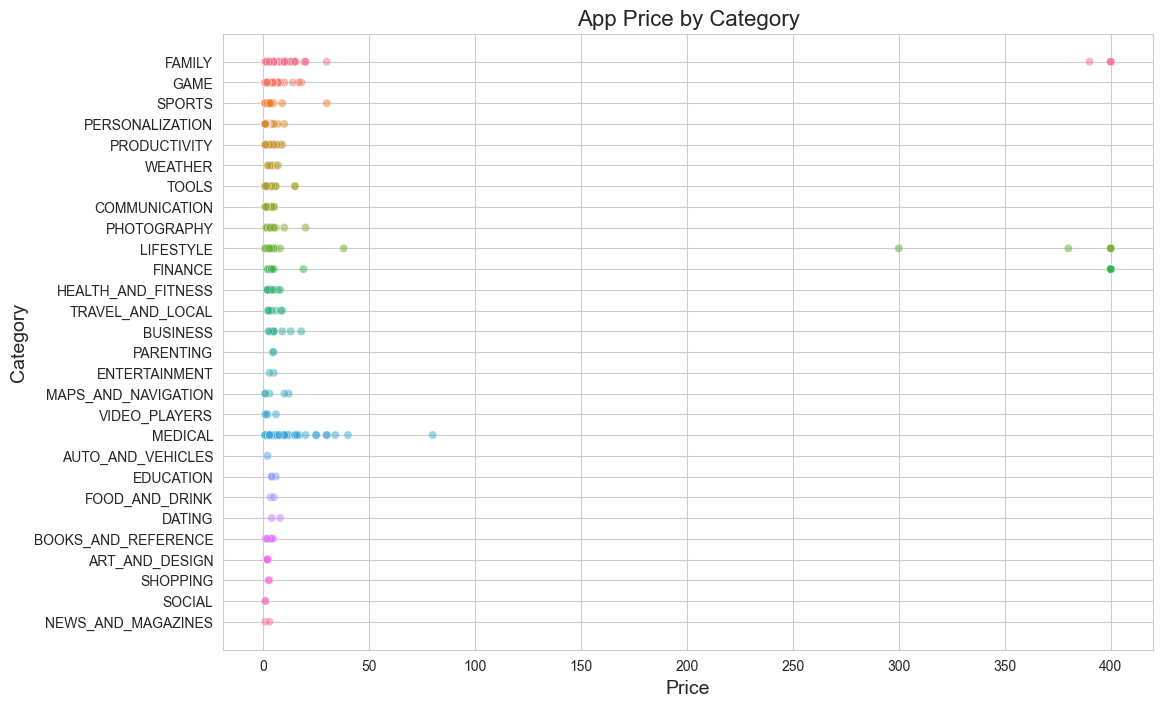

In [167]:
# filter only paid apps
paid_apps = playstore[playstore['Type'] == 'Paid']

# create a scatter plot with different colors per category
plt.figure(figsize=(12, 8))
sns.scatterplot(data=paid_apps, x='Price', y='Category', hue='Category', alpha=0.5, legend=False)

# set the x-axis ticks to go from 50 to 50
plt.xticks(range(0, int(paid_apps['Price'].max()) + 50, 50))
plt.title('App Price by Category', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()

MEDICAL AND FAMILY ARE THE CATEGORIES WITH MORE EXPENSIVE APPS IF WE SEE PRICES LESS THAN $50. BUT I CAN SEE APPS FOR $400!! IN FAMILY, LIFESTYLE AND FINANCE.

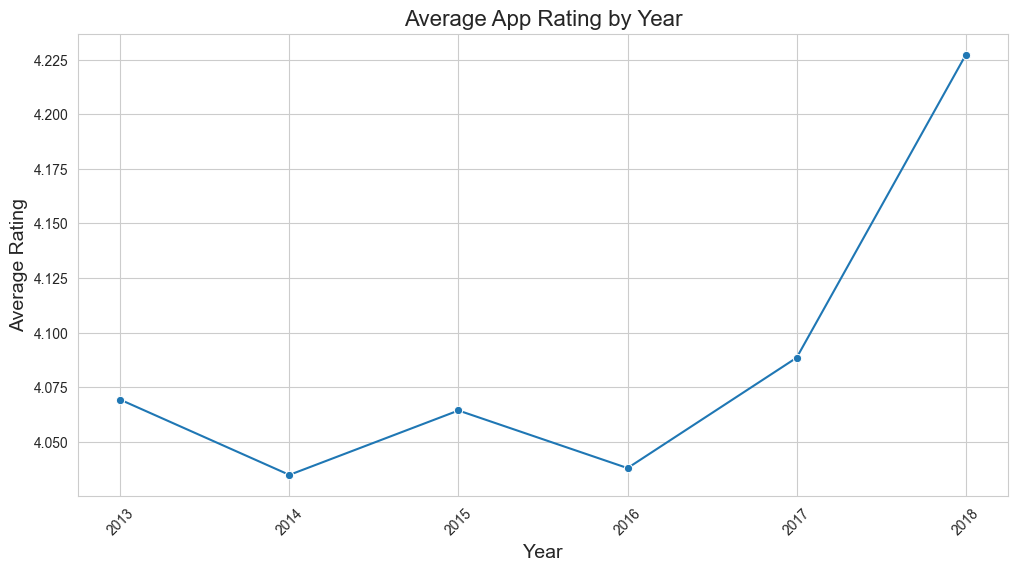

In [173]:
# make sure 'Last Updated' is in date format
playstore['Last Updated'] = pd.to_datetime(playstore['Last Updated'])

# extract year from date
playstore['Year Updated'] = playstore['Last Updated'].dt.year

# filters the dataframe to only include data from 2013 to 2018
filtered_playstore_df = playstore[(playstore['Year Updated'] >= 2013) & (playstore['Year Updated'] <= 2018)]

# calculate the average rating per year
average_rating_by_year = filtered_playstore_df.groupby('Year Updated')['Rating'].mean().reset_index()

# create the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_rating_by_year, x='Year Updated', y='Rating', marker='o')
plt.xticks(average_rating_by_year['Year Updated'].unique(), rotation=45)
plt.title('Average App Rating by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(True)
plt.show()

IN THIS GRAPH WE CAN NOTE THAT THE RATING OF THE APPS IS INCREASE IN RECENT YEARS

C:\Users\Alejandro Verdugo\AppData\Local\Temp\ipykernel_4944\3458575919.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = playstore.corr()


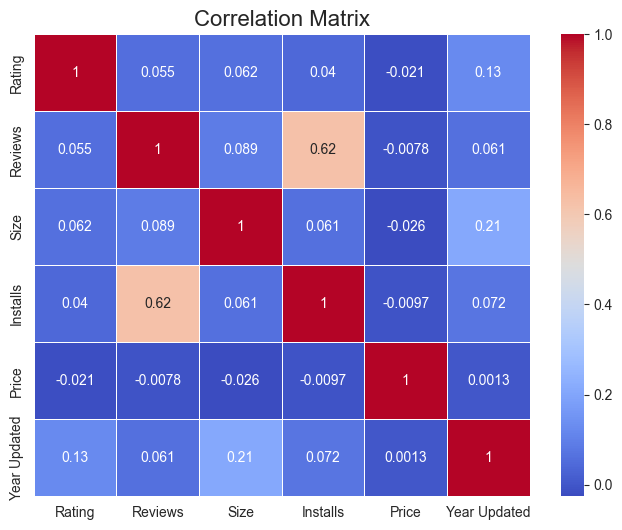

In [169]:
# calculate the correlation between features
correlation_matrix = playstore.corr()

# create a heat map to visualize the matrix correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

IN THIS BASIC CORRELATION MATRIX I CAN SEE A POSITIVE MODERATE CORRELATION BETWEEN REVIEWS AND INSTALLS, WHERE WE COULD FIND A CERTAIN LOGIC, THE MORE INSTALLATIONS THE APPLICATION HAS, THE MORE COMMENTS AND PEOPLE ATTENTION IT GETS

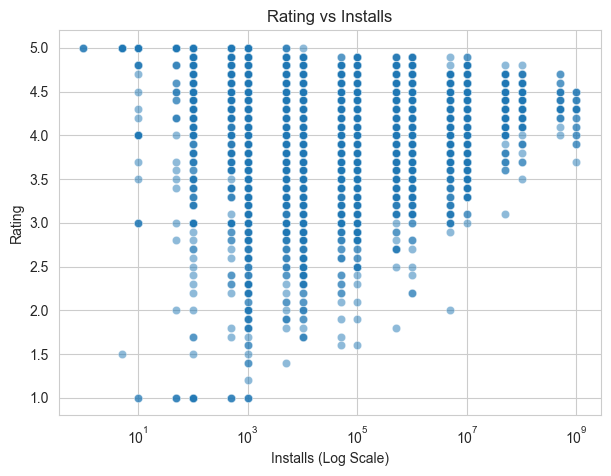

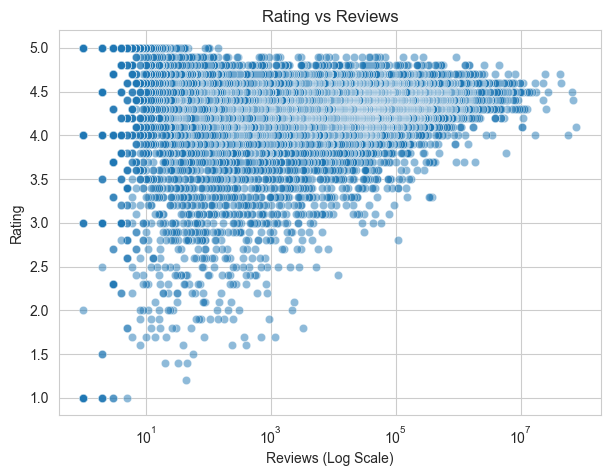

(0.040232000626644324, 0.05514802726375965)

In [170]:
# scatter plot for 'installs' vs 'rating'
plt.figure(figsize=(7, 5))
sns.scatterplot(data=playstore, x='Installs', y='Rating', alpha=0.5)
plt.title('Rating vs Installs')
plt.xscale('log')
plt.xlabel('Installs (Log Scale)')
plt.ylabel('Rating')
plt.show()

# scatter plot for 'reviews' vs 'rating'
plt.figure(figsize=(7, 5))
sns.scatterplot(data=playstore, x='Reviews', y='Rating', alpha=0.5)
plt.title('Rating vs Reviews')
plt.xscale('log')
plt.xlabel('Reviews (Log Scale)')
plt.ylabel('Rating')
plt.show()

# correlation between 'installs' and 'rating', and 'reviews' y 'rating'
correlation_installs_rating = playstore['Installs'].corr(playstore['Rating'])
correlation_reviews_rating = playstore['Reviews'].corr(playstore['Rating'])

correlation_installs_rating, correlation_reviews_rating

THE CORRELATION IS ALMOST A NUMBER CLOSE TO ZERO, THIS MEANS THAT THERE IS NOT A GREAT CORRELATION BETWEEN THIS TWO FEATURES AND RATING.